### Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [1]:
# Importando os módulos
import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline

In [2]:
# Carregando o dataset
df = pd.read_csv("pima-data.csv")

In [3]:
df.head()
# Primeira coluna: index
# 9 colunas com variáveis preditoras, ou seja, dados de entrada [INPUT]
# Coluna "diabetes", variável targert: é o dado de saída [OUTPUT]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df.shape
# 768 linhas, 10 colunas

(768, 10)

In [5]:
# Não temos valores nulos nesse dataset
df.isnull().values.any()

False

In [6]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

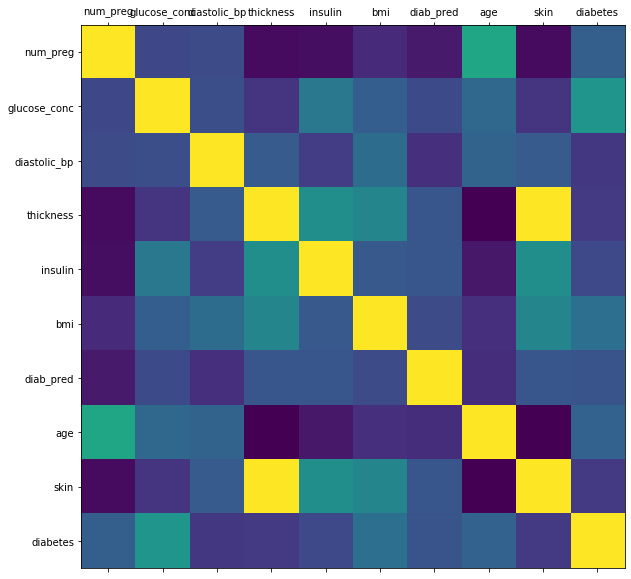

In [7]:
# Criando o gráfico de correlações
plot_corr(df)

In [8]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
# Definindo as classes
diabetes_map = {True : 1, False : 0}

In [10]:
# Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [11]:
# Verificando as primeiras linhas do dataset
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [12]:
# Verificando como os dados estão distribuídos
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


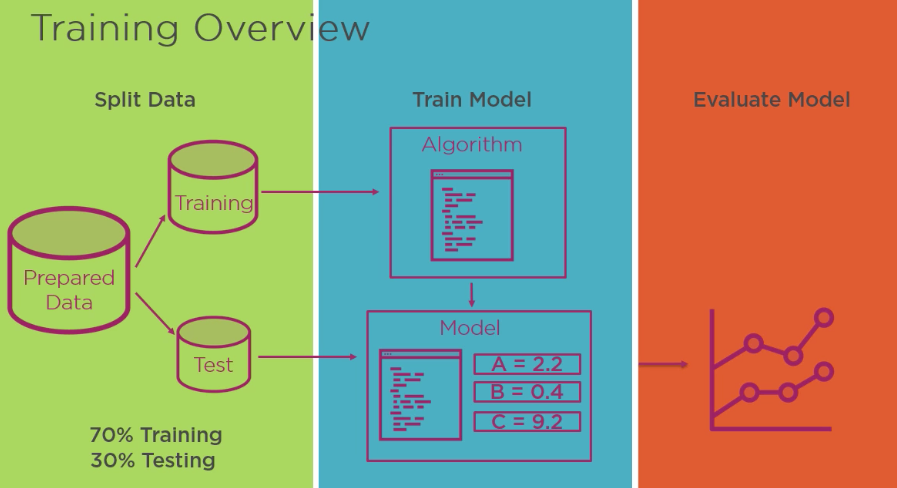

In [13]:
from IPython.display import Image
Image('Treinamento.png')

In [14]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [15]:
# Seleção de variáveis preditoras (as mais relevantes para o modelo)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [16]:
# Variável a ser prevista
atrib_prev = ['diabetes']

In [17]:
# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [18]:
# Definindo a taxa de split
split_test_size = 0.3
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [19]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


### Verificando o Split

In [20]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


### Valores Missing Ocultos

In [21]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

O fato de não termos valores nulos, não quer dizer que não há valores faltantes. No momoneto do preenchimento o sistema ou a pessoa que fez o registro pode tratar os dados faltantes atribuindo algum valor. 

Note a coluna "insulin", os três primeiros registros estão zerados. Mas isso muito provavelmente foi a forma escolhida para tartar esse dado faltante, visto que uma pessoa não pode ter 0 de insulina no sangue.

In [22]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


Essa pratica no preenchimento de registros não é incorreta, desde que haja alguma legenda ou documentação sobre. Nem sempre isso estará bem documentado, nesses casos entra a analise do ciêntista de dados para identificar esse tipo de comportamento no dataset.

Esse assunto é importante, pois isso pode mudar completamente o resultado no modelo de machine learning e gerar resultados indesejados. Há diversas formas de tratar esses valores faltantes, o ideal é verificar junto a equipe qual a melhor maneira.

In [23]:
# Verificando a quantidade de zeros em cada coluna 
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


### Tratando Dados Missing - Impute

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
# Criando objeto
# Chamando a função SimpleImputer passando 0 como missing_values e a média dos valores como parâmetros
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

50 a 80% do tempo de trabalho de um Cientista de Dados é usado na preparação dos dados

### Construindo e treinando o modelo

In [26]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [27]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [28]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Verificando a exatidão no modelo nos dados de treino

In [29]:
from sklearn import metrics

In [30]:
nb_predict_train = modelo_v1.predict(X_treino)

In [31]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))

Exatidão (Accuracy): 0.7542


Entendendo os parâmetros passados: 

- Y_treino: é exatamente a variável target (saída)
- nb_predict_train: são as previsões que o modelo fez

O resultado é a porcentagem de acertos do modelo: 75,42%

### Verificando a exatidão no modelo nos dados de teste

In [32]:
nb_predict_test = modelo_v1.predict(X_teste)

In [33]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Exatidão (Accuracy): 0.7359


Veja que a porcentagem de acertos diminui em teste: 73,59%
Isso se deve ao fato do modelo estar trabalhando com um conjunto de dados ao qual ele nunca tinha visto antes.

### Otimizando o modelo com RandomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [37]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão (Accuracy): 0.7403



Veja que nesse segundo modelo houve um overfitting no treino, tivemos 100% de acerto. Isso por que o algoritmo já conhecia esses valores. Já no teste o resultado foi diferente, houve 74,03% de acertos e isso destaca a imporância da fase de teste.

### Regressão Logística
O algoritmo de regressão logística é um algoritmo de classificação

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [41]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))

Exatidão (Accuracy): 0.7359


Resumindo...
Exatidão nos dados de teste:

- Modelo usando algoritmo Naive Bayes         = 0.7359
- Modelo usando algoritmo Random Forest       = 0.7400
- Modelo usando algoritmo Regressão Logística = 0.7446

### Fazendo Previsões Com o Modelo Treinado

In [43]:
import pickle

In [44]:
# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))
# A função dump do pacote pickle permite salvar o modelo modelo_v3 com o nome modelo_treinado_v3.sav

In [45]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

[0]
[1]
